In [1]:
from picamera2 import Picamera2
from libcamera import controls
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
picam2 = Picamera2()

[3:42:44.455361556] [17361]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[3:42:44.468386282] [17376]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[3:42:44.469447283] [17376]  WARN CameraSensorProperties camera_sensor_properties.cpp:286 No static properties available for 'ov9281'
[3:42:44.469467097] [17376]  WARN CameraSensorProperties camera_sensor_properties.cpp:288 Please consider updating the camera sensor properties database
[3:42:44.473194117] [17376]  INFO RPI pisp.cpp:1154 Registered camera /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 to CFE device /dev/media0 and ISP device /dev/media2 using PiSP variant BCM2712_C0
[3:42:44.479188378] [17361]  INFO Camera camera_manager.cpp:313 libcamera v0.3.0+65-6ddd79b5
[3:42:44.489819030] [17378]  INFO RPI pisp.cpp:695 libpisp version v1.0.6 b567f0455680 17-06-2024 (10:20:00)
[3:42:44.490828030] [17378]  WARN CameraSensorProperties camera_sensor_properties.cpp:286 No static properties

In [3]:
frame_size = (1200, 800)
WIDTH = frame_size[0]
HEIGHT = frame_size[1]
main = {"format": "YUV420", "size": (WIDTH, HEIGHT)}

In [4]:
_c = {
    "FrameRate": 120,
    # 'ExposureTime':500
}

config = picam2.create_video_configuration(main, controls=_c)

In [5]:
# config = picam2.create_video_configuration(raw=picam2.sensor_modes[2], controls={"ExposureValue":5},sensor={'bit_depth': 8,})

picam2.configure(config)
picam2.start()
time.sleep(2)

[3:42:44.553524421] [17361]  WARN V4L2 v4l2_pixelformat.cpp:344 Unsupported V4L2 pixel format RPBP
[3:42:44.554709033] [17361]  INFO Camera camera.cpp:1183 configuring streams: (0) 1200x720-YUV420 (1) 1280x720-MONO_PISP_COMP1
[3:42:44.555574922] [17378]  INFO RPI pisp.cpp:1450 Sensor: /base/axi/pcie@120000/rp1/i2c@88000/ov9281@60 - Selected sensor format: 1280x720-Y10_1X10 - Selected CFE format: 1280x720-PC1M


In [13]:
img = picam2.capture_array()
img.shape

(1080, 1280)

In [10]:
gray_image = img[:HEIGHT, :WIDTH]

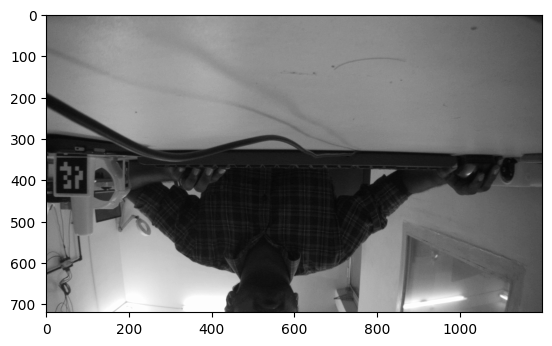

In [14]:
plt.imshow(gray_image, cmap="gray")